# Test

## Import Modules

In [1]:
import utils
import functions

import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc
import pandas as pd
from random import randrange
from tqdm import tqdm
# import openai
import os
from time import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from random import randrange
from math import exp
from dotenv import load_dotenv

# 개인 api key
load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
# openai.api_key = OPENAI_API_KEY

m_num = 6
"""
- `curie:ft-personal-2023-05-31 08-28-50` : csi 데이터 학습
- `curie:ft-personal-2023-06-11 18-10-30` : 總 데이터 사고경위만 학습
- `curie:ft-personal-2023-06-12-06-34-37` : 總 데이터 키워드化하여 사고경위와 함께 학습
- `curie:ft-personal-2023-07-14-07-12-02` : Structured + Unstructured
- `curie:ft-personal-2023-07-15-11-00-14` : Unstructured only
- `curie:ft-personal-2023-08-05-23-22-50` : Causes
"""
ft_models = {1 : "curie:ft-personal-2023-05-31 08-28-50",
            2 : "curie:ft-personal-2023-06-11 18-10-30",
            3 : "curie:ft-personal-2023-06-12-06-34-37",
            4 : "curie:ft-personal-2023-07-14-07-12-02",
            5 : "curie:ft-personal-2023-07-15-11-00-14",
            6 : "curie:ft-personal-2023-08-05-23-22-50"}
pp_datas = {1 : "C:/Users/bhyoo/Desktop/Causual Analysis/CSI_DESKTOP_Test/s_filtered_sieben_codex_v3_prepared.jsonl",
            2 : "C:/Users/bhyoo/Documents/My Projects/Causal Analysis/GPT Fine-tuning/prepocess/prepocessed.jsonl",
            3 : "C:/Users/bhyoo/Documents/My Projects/Causal Analysis/GPT Fine-tuning/prepocess/prepocessed with keywords.jsonl",
            4 : "C:/Users/bhyoo/Documents/My Projects/Causal Analysis/GPT Fine-tuning/prepocess/result35.jsonl",
            5 : "C:/Users/bhyoo/Documents/My Projects/Causal Analysis/GPT Fine-tuning/prepocess/result37.jsonl",
            6 : "C:/Users/bhyoo/Documents/My Projects/Causal Analysis/GPT Fine-tuning/prepocess/causes.jsonl"}
ft_model = ft_models[m_num]
pp_data = pp_datas[m_num]
classes = ["기타", 
            "넘어짐", 
            "부딪힘", 
            "절단, 베임, 찔림",
            "추락", 
            "협착"]

Model = functions.FineTuneModel(OPENAI_API_KEY, ft_model, classes)

## Preparing Dataset

In [3]:
data_dir = "C:/Users/bhyoo/Documents/My Projects/Causal Analysis/Preprocessed/"
target_file = data_dir + "testset/causes_test.xlsx" 
prepocess_dir = "prepocess/"

# %%
df = pd.read_excel(target_file)
# df.rename(columns = {"사고경위" : "prompt", "재해유형" : "completion"}, inplace = True)
print(f"Length : {len(df)}")
df.head()


Length : 593


,Unnamed: 0,completion,prompt
0,3,기타,작업
1,6,기타,1. 2017년 6월 20일(화) 13:20경\n2. 204동 전면 지상에서 콘크리...
2,16,기타,제10호 태풍 '하이선'이 영남지역과 동해안 인근내륙 중
3,40,기타,"배관 Support 자재(“ㄷ” 자 자재, 1,500mm, 약 15kg)를 인력으로..."
4,42,기타,지하 5층에서 타워크레인으로 잉여자재(데크)를 인양 중 자재가 추락하여 작업


In [26]:
no = randrange(1, 593)
# no = 4_333

sample_prompt, sample_completion = functions.sample_loader(df, no)

print(f"[row number] {no}\n[prompt] {sample_prompt}[completion] {sample_completion}")

[row number] 486
[prompt] 1층 D/A 형틀제거 완료 후 이동중 작업 

###

[completion] 추락


In [27]:
print(sample_prompt)

1층 D/A 형틀제거 완료 후 이동중 작업 

###




In [28]:
pred, probs = Model.run(prompt=sample_prompt)
print(f"[Prediction] {pred}\n[Probability] {probs}")

[Prediction] 추락
[Probability] 0.6166205352985987


100%|██████████| 593/593 [08:26<00:00,  1.17it/s]


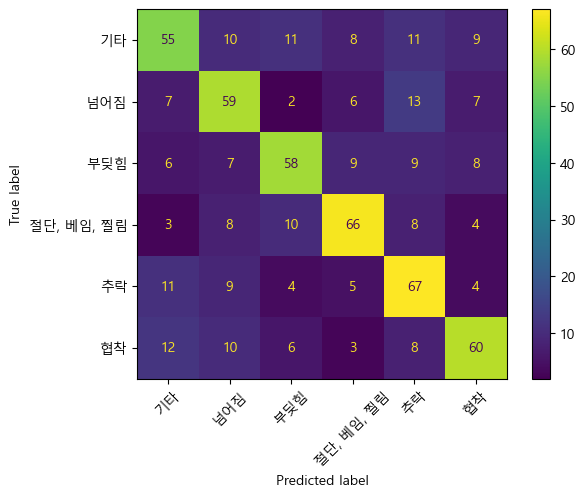

accuracy : 61.551%
classification report : 
              precision    recall  f1-score   support

          기타       0.59      0.53      0.56       104
         넘어짐       0.57      0.63      0.60        94
         부딪힘       0.64      0.60      0.62        97
  절단, 베임, 찔림       0.68      0.67      0.67        99
          추락       0.58      0.67      0.62       100
          협착       0.65      0.61      0.63        99

    accuracy                           0.62       593
   macro avg       0.62      0.62      0.62       593
weighted avg       0.62      0.62      0.62       593




In [25]:
"""
NUM = 600
test_size = 600
num_e = 10

# train_set = pd.read_json(pp_datas[m_num], lines=True)
# X_train, y_train, X_test, y_test = [], [], [] ,[]

L = list()
cnt = 0
if test_size != -1:
    print(f"[INF] Random Mode : Selecting random elements.")
    while(cnt < test_size):
        L.append(randrange(1, NUM))
        cnt += 1

else:
    print(f"[INF] Even Mode : Selecting {str(num_e)} elements for each classes.")
    while(cnt < len(classes) * num_e):
        _n = randrange(1, NUM)
        if df.iloc[_n,  df.columns.get_loc('completion')] == classes[cnt // num_e]:
            L.append(_n)
            cnt += 1
"""
plt.rcParams['font.family'] = 'Malgun Gothic'

L = df["prompt"].values.tolist()

X_test, y_test, predictions = [], [], []
start_time = time()
for _n in tqdm(range(len(L))):
    # _n = randrange(1, NUM)
    # X_train.append(train_set['prompt'][_n] + "\n\n###\n\n")
    # y_train.append(train_set['completion'][_n])
    _x = df.iloc[_n, df.columns.get_loc('prompt')]  # + "\n\n###\n\n"
    X_test.append(_x)
    y_test.append(df.iloc[_n,  df.columns.get_loc('completion')])
    predict, _ = Model.run(prompt=_x)
    # print(f"[True] {df.iloc[_n,  df.columns.get_loc('completion')]} / [Predict] {predict}")
    predictions.append(predict)

op_time = time() - start_time

cm = confusion_matrix(y_test, predictions, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot()

plt.xticks(rotation=45)
plt.show()

print(f"accuracy : {(accuracy_score(y_test, predictions))*100:.3f}%")
print(f"classification report : \n{classification_report(y_test, predictions)}\n")